# test the bridge code

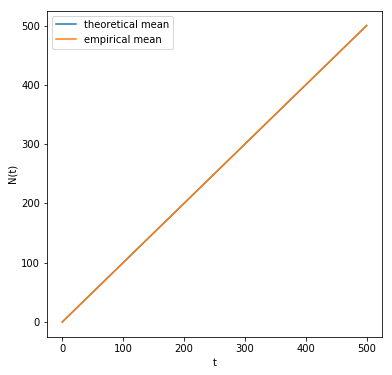

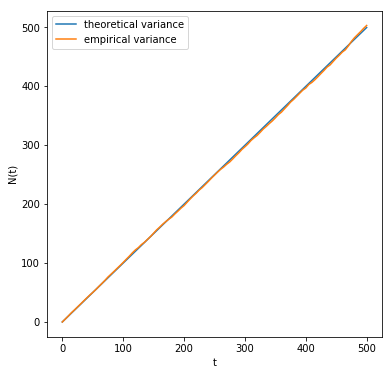

(slope, intercept, r): (0.9982623906271326, -0.0005153405149737056, 0.9999991316269363)


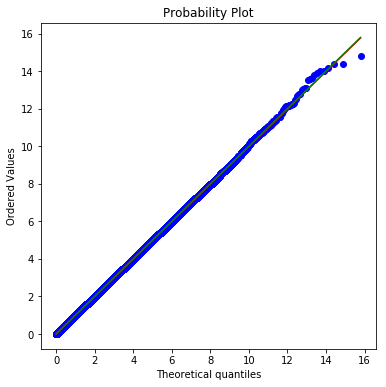

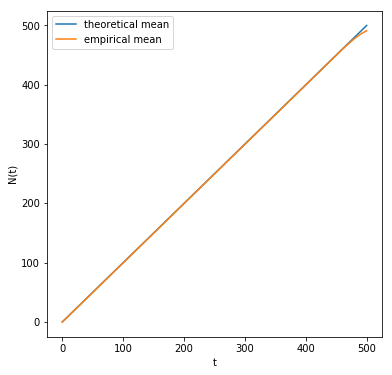

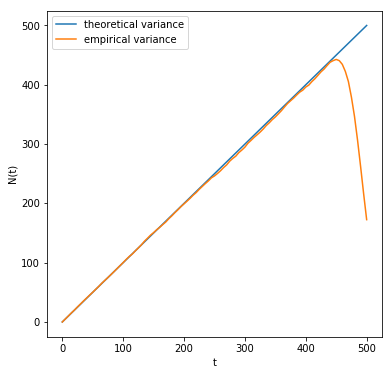

(slope, intercept, r): (1.0011745311795963, -0.0009465232855896399, 0.9999971819291733)


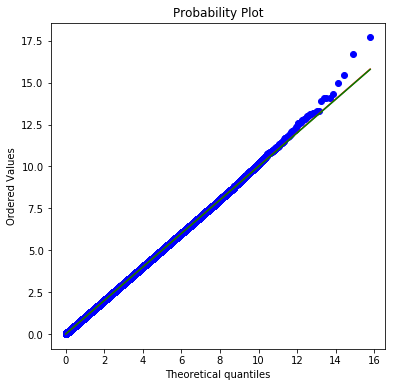

In [2]:
%matplotlib inline

from binomial_bridge import BinomialBridge
from beta_bridge import BetaBridge

import numpy as np
import scipy
import sobol_seq
import matplotlib.pyplot as plt

#jump_times_list is a list of jump time paths, where each element corresponds to a path
def plot_jump_times_stats(jump_times_list, T):
    times_interp = np.linspace(0, T, 100+1)
    counts = [range(1, len(jump_times)+1) for jump_times in jump_times_list]

    interp_functions = [scipy.interpolate.interp1d(jump_times, count, kind='previous', fill_value=(0, count[-1]), bounds_error=False)
                        for jump_times,count in zip(jump_times_list, counts)]

    interp_counts = [func(times_interp) for func in interp_functions]
    interp_counts = np.vstack(interp_counts)

    plt.figure(figsize=(6,6))
    plt.plot(times_interp, times_interp, label='theoretical mean')
    plt.plot(times_interp, np.mean(interp_counts, axis=0), label='empirical mean')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('N(t)')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.plot(times_interp, times_interp, label='theoretical variance')
    plt.plot(times_interp, np.var(interp_counts, axis=0), label='empirical variance')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('N(t)')
    plt.show()

    plt.figure(figsize=(6,6))
    interarrival_times = [np.diff(jump_times, prepend=0) for jump_times in jump_times_list]
    interarrival_times = np.concatenate(interarrival_times)

    #the distribution is not really exponential, but for large T it is pretty close
    quantiles, line = scipy.stats.probplot(interarrival_times, dist='expon', plot=plt)
    print('(slope, intercept, r): {}'.format(line))
    x = np.linspace(0, quantiles[0][-1], 101)
    plt.plot(x,x, color='green')
    plt.show()

################################
# parameters for the tests
################################
n = 10**4
discretization_power = 4
dim = 2**discretization_power
    
T = 500
Y_at_T = 500

# points = sobol_seq.i4_sobol_generate(dim, n).T
# np.random.seed(0)
points = np.random.uniform(size=(dim, n))

################################
# test the binomial bridge
################################
binom_bridge = BinomialBridge(T, discretization_power, points)
binom_bridge.generate()
binom_bridge.fill_jump_times()

plot_jump_times_stats(binom_bridge.jump_times, T)

################################
# test the beta bridge
################################
beta_bridge = BetaBridge(Y_at_T, discretization_power, points)
beta_bridge.generate()
beta_bridge.fill_jump_times()

plot_jump_times_stats(beta_bridge.jump_times, Y_at_T)